# Meteority

## Zadání 

Vyčíslete a zdůvodněte jednotlivé rozdíly výskytů meteoritů napříč definovanými skupinami. Napište krátké pojednání a doprovoďte ho vypracovanou statistikou, ať již v podobě grafů nebo jen tabulek.

## Řešení

Meteority lze rozdělit do tří velkých skupin: 1. kamenné (chondrity a achondrity), 2. železné, 3. železo-kamenné, kde většina dopadnuvších meteoritů je z první skupiny (~93%). Počet dopadů zelezných a železno-kamenných tvoří ~6% respektive ~1% [Harvey a Cassidy (1989) Meteoritics, v. 24, pp. 9-14.] . Pro ověření jsme si stáhli data ze zadané [stránky](https://www.lpi.usra.edu/meteor/) do Excelové tabulky. Pro další zpracování využíváme knihovnu Pandas (Python).

Grafy četností ukazují, že převážný počet meteoritů patří do skupin `L*` a `H*` tzn. mezi chondrity. Dále v menší míře achondrity (*Eucrites*, *Ureilites*). Zbylé četnosti dopadů patří do nízkých desítek (dohromady stovek). 

Pracovní (přeložené) poznámky z doporučené knižní [kapitoly](https://evols.library.manoa.hawaii.edu/handle/10524/33765) jsou uvedeny na konci dokumentu.

### Načteme potřebné knihovny

In [84]:
import pandas as pd

###  Načteme data z Excelového sešitu do datového rámce (`pandas.DataFrame`)

In [85]:
data = pd.read_excel("./Meteorites.xlsx")

###  Prohlédnems si pět prvních a posledních řádků

In [86]:
data.head(10)

,Name,Abbrev,Status,Fall,Year,Place,Type,Mass,MetBull,Antarctic,GoogleEarthMap,Notes
0,Aydar **,NaN,Official,NaN,2017.0,Morocco,Acapulcoite,533 g,107,NaN,NaN,NaN
1,Elephant Moraine 14074 **,EET 14074,Official,NaN,2014.0,Antarctica,Acapulcoite,14.4 g,107,KOREAMET,NaN,NaN
2,Northwest Africa 12199 **,NWA 12199,Official,NaN,2018.0,Western Sahara,Acapulcoite,499 g,107,NaN,NaN,NaN
3,Northwest Africa 11739 **,NWA 11739,Official,NaN,2017.0,(Northwest Africa),Achondrite-prim,20 g,107,NaN,NaN,NaN
4,Northwest Africa 11112 **,NWA 11112,Official,NaN,2016.0,Morocco,Achondrite-ung,528 g,107,NaN,NaN,NaN
5,Northwest Africa 11558 **,NWA 11558,Official,NaN,2017.0,(Northwest Africa),Achondrite-ung,3.92 g,107,NaN,NaN,NaN
6,Northwest Africa 11562 **,NWA 11562,Official,NaN,2017.0,(Northwest Africa),Achondrite-ung,1361 g,107,NaN,NaN,NaN
7,Northwest Africa 11575 **,NWA 11575,Official,NaN,2016.0,Mali,Achondrite-ung,598 g,107,NaN,NaN,NaN
8,Northwest Africa 11916 **,NWA 11916,Official,NaN,2014.0,(Northwest Africa),Achondrite-ung,10.4 g,107,NaN,NaN,NaN
9,Northwest Africa 12217 **,NWA 12217,Official,NaN,2015.0,(Northwest Africa),Achondrite-ung,148 g,107,NaN,NaN,NaN


In [87]:
data.tail(10)

,Name,Abbrev,Status,Fall,Year,Place,Type,Mass,MetBull,Antarctic,GoogleEarthMap,Notes
2704,Northwest Africa 12198 **,NWA 12198,Official,NaN,2018.0,Western Sahara,Ureilite,506 g,107,NaN,NaN,NaN
2705,Northwest Africa 12237 **,NWA 12237,Official,NaN,2017.0,(Northwest Africa),Ureilite,479 g,107,NaN,NaN,NaN
2706,Northwest Africa 12271 **,NWA 12271,Official,NaN,2018.0,(Northwest Africa),Ureilite,925 g,107,NaN,NaN,NaN
2707,Northwest Africa 12321 **,NWA 12321,Official,NaN,2004.0,(Northwest Africa),Ureilite,194 g,107,NaN,NaN,NaN
2708,Ramlat as Sahmah 530 **,RaS 530,Official,NaN,2014.0,"Al Wusta, Oman",Ureilite,30 g,107,NaN,NaN,NaN
2709,San Juan 100 **,SJ 100,Official,NaN,2018.0,"Antofagasta, Chile",Ureilite,160.7 g,107,NaN,NaN,NaN
2710,Yamato 000614,Y-000614,Official,NaN,2000.0,Antarctica,Ureilite,4.68 g,107,J26 NIPR,NaN,NaN
2711,Northwest Africa 11511 **,NWA 11511,Official,NaN,2017.0,Algeria,Ureilite-an,527 g,107,NaN,NaN,NaN
2712,Northwest Africa 11807 **,NWA 11807,Official,NaN,2018.0,(Northwest Africa),Winonaite,172.5 g,107,NaN,NaN,NaN
2713,Northwest Africa 11917 **,NWA 11917,Official,NaN,2012.0,(Northwest Africa),Winonaite,304 g,107,NaN,NaN,NaN


###  Zjistíme celkový počet řádků

In [88]:
data.shape[0]

2714

### Spočteme a zobrazíme četnosti skupin

Spočteme a zobrazíme si četnosti dopadů jednotlivých skupin. Zobrazíme jen četnosti větší než 10, 30, 50 a 100 (v datech je zázanmů s velmi málo výskyty).

<AxesSubplot: >

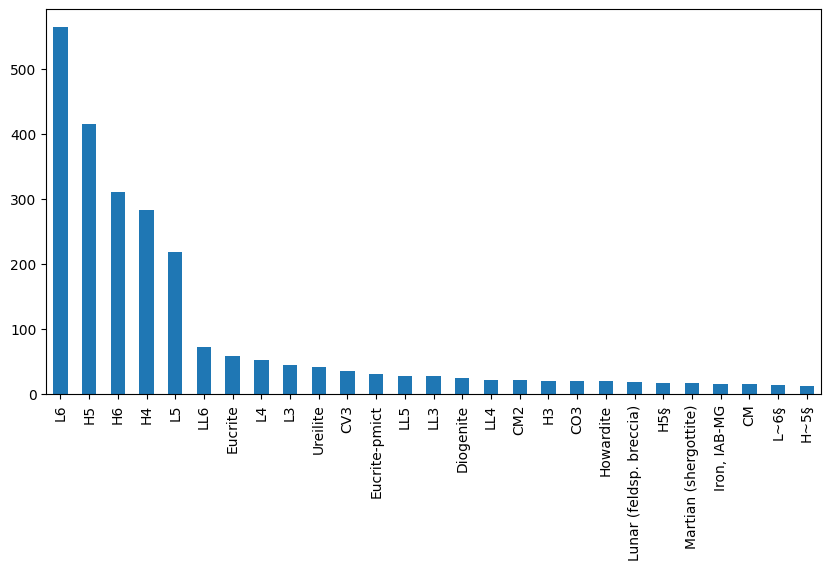

In [99]:

data_gt_10 = data["Type"].sort_values().value_counts()[data['Type'].value_counts() > 10]

data_gt_10.plot(kind="bar", figsize=(10, 5))


<AxesSubplot: >

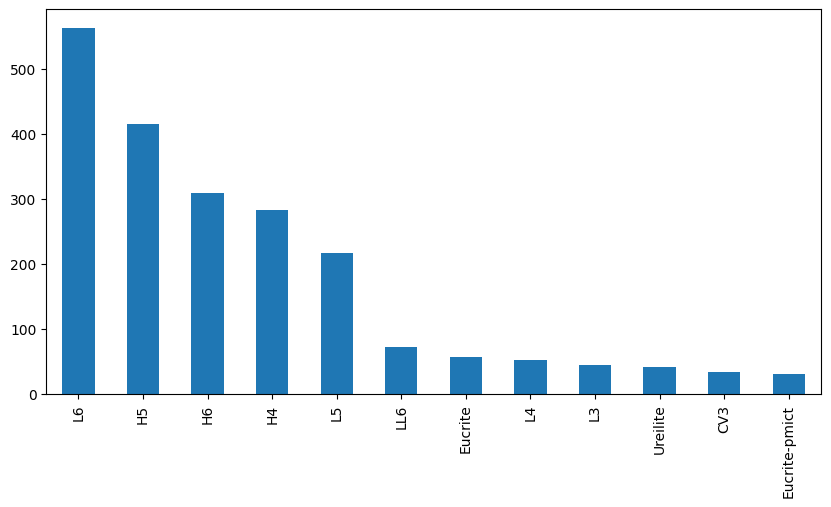

In [100]:
data_gt_30 = data["Type"].sort_values().value_counts()[data['Type'].value_counts() > 30]

data_gt_30.plot(kind="bar", figsize=(10, 5))

<AxesSubplot: >

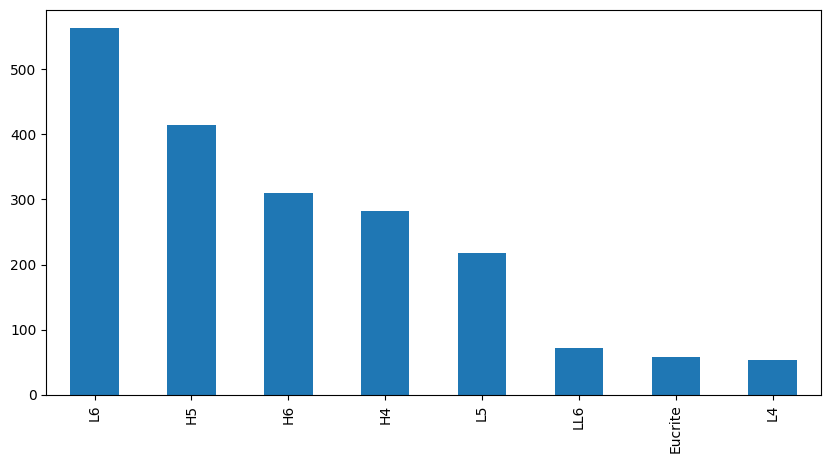

In [101]:
data_gt_50 = data["Type"].sort_values().value_counts()[data['Type'].value_counts() > 50]

data_gt_50.plot(kind="bar", figsize=(10, 5))

<AxesSubplot: >

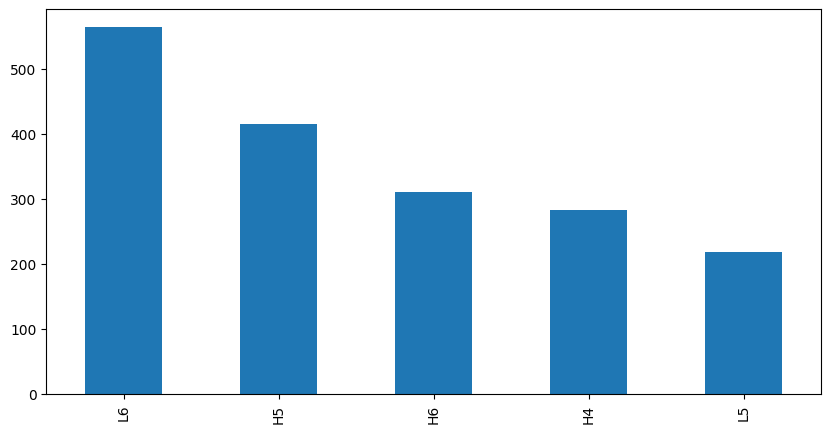

In [102]:
data_gt_100 = data["Type"].sort_values().value_counts()[data['Type'].value_counts() > 100]

data_gt_100.plot(kind="bar", figsize=(10, 5))

## Poznámky (pracovní)

**Pravděpodobně se každá skupina vytvořila v samostatném prostředí se specifickou hloubkou
vzniku, gravitačním polem, věkem, začáteční a končící teplotou a rychlostí ochlazování.
Velikost mateřských těles se mohla měnit v důsledku velkých faktorů, kdy některé možná
byly centrálními jádry 100 km těles, jiné s vyšší rychlostí ochlazování, možná tvořily metrové
hrozny v horním plášti toho stejného nebo jiného rodového tělesa.**

- Je docela zajímavé, že chondrity jsou převážně dost homogenní a lze je poměrně dobře
klasifikovat. Není zde žádný nezařazený a méně než jedno procento anomálních vzorků. U
železných meteoritů je to, co se týče klasifikace poněkud složitější.

- Chondrity obsahují milimetrové částečky křemitých střepů, chondruly, 19 – 35% železa (volné
nickeliferous iron nebo vázené na troilit a silikáty).

- „Tento „systém“ má pouze poskytnout obraz o chemických vztazích mezi podskupinami, a
nikoli naznačit genezi. V současné době neexistuje dostatek důkazů, které by umožňovaly
jasné závěry ohledně vzniku různých skupin meteoritů. „

- Pro karbonátové chondrity je předvídáno větší množství skupin a podskupin.

- Ve většině chondritů jsou hlavními minerály olivín, ortopyroxen, albitický živec, troilit, kalc.
pyroxen a kovové nikl-železo (Kamacite, taenit a jejich plessitní srůsty). Kamacit z
enstatitových chondritů je pozoruhodný vysokým obsahem křemíku (14% hmotnosti), což je
kompozice, která se jinde vyskytuje jen v některých enst. achondritech a několika železných
meteoritech (např. Tucson a Horse Creek). U karbonových chondritů se vyskytuje magnetit,
epsomit (síran hořečnatý), pyrrhotit, dolomit a další minerály, často s „Křišťálovou“ vodou?,
ale zajímavé jsou zejména organické sloučeniny.

- Dále poměrně detailní informace ohledně rozdílů jednotlivých skupin. (Je třeba to klasifikovat
co chceme vysvětlovat, aby z toho bylo KRÁTKÉ pojednání.

- Pro vznik chondrulitů byly navrženy dvě zásadní hypotézy: Jedna hypotéza naznačuje, že
chondrulity jsou primární objekty, které kondenzovaly z relativně pomalu se ochlazující
plynné mlhoviny solárního složení a pak se aglomerovaly za vytvoření mateřských těles
meteoritu. Druhá hypotéza naznačuje, že chondrulity jsou druhotné objekty vytvořené z již
existujících pevných látek procesy, jako je vulkanismus (Tschermak, 1875), šoková
metamorfóza (Fredriksson, 1963), távení primitivního prachu (Wood, 1963) nebo vznik
elektrickými výboji primitivního oblaku prachu (Whipple, 1966).

- Po stanovení výše uvedených tříd zůstává řada železitých meteoritů, které jsou dostatečně
anomální, aby vyžadovaly individuální klasifikaci, jako jedinečné exempláře. Někdy se zdá, že
dvě nebo více tvoří dvojice nebo trojice, ale obecně vzato anomální železité meteority
zahrnují meteority, které jsou strukturálně i chemicky snadno rozpoznatelné. Zdá se, že jde o
bodové vzorky různých, velmi malých „populací“. N'Goureyma, Barranca Blanca, Zacatecas,
Santa Rosa, Tucson a Nový Baltimore jsou dobrými příklady. Anomální meteority jsou často
relativně jemnozrnné. Velikost prvotního taenitového krystalu byla řádově 1-3 cm místo
obvyklé velikosti destet cm až metr. Řezy skrz např. Tucson, Mundrabilla, Santa Rosa a
N'Goureyma jasně ukazují polykrystalické pole velikých krystalů, často s hojným množstvím
křemičitanů nebo troilitu v hranicích zrn.

- Celkově můžeme říct, že se vyskytuje méně strukturálně anomálních meteoritů než chemicky
anomálních meteoritů. Mnoho chemicky anomálních meteoritů může být zařazených do
skupin oktahedritu a ataxitu.

- Meteority nejsou brekciované, ale jsou to polykrystalické agregáty feritových a
austenitových zrn, které narostli do jejich aktuální velikosti (solid state) difuzí.

- Existuje mnoho železitých meteoritů, které po rozřezání mohou být složené z několika
krystalů taenitu, což z nich dělá anomálii. Ale většina je normálním členem skupiny. Jsou
klasifikované podle šířky pásma, ale předpona „polykrystalický“ naznačuje, že zkoumané
vzorky byly složené z několika krystalů taenitu. Pokud tato předpona není uvedená,
předpokládá se, že příslušné meteority jsou nebo při austenitických teplotách byly, jednotlivé
krystaly taenitu větší jako stopa.

- U jednotlivých meteoritech je uvedený kvalifikační údaj o množství a povaze inkluzí (silikáty,
grafit, troilit) a o stavu rekrystalizace, jestli se považuje za charakteristický pro konkrétní
meteorit. Zatím co v každé třídě nebo skupině může nastat rekrystalizace a jiné znaky
kosmického přehřátí, zdá se, že křemičitany jsou ve významných množství omezené na hrubé
oktaedrity skupiny I a na několik anomálních železitých meteoritů.

- Strukturní klasifikační schéma, jak je rozvinuté výše, se jen mírně liší od klasických. Je
záměrně vyvinuté tak, aby zůstal čistě popisných systémem založeným na morfologických
znacích, které se dají lehce pozorovat okem nebo lupou. Neměl by se tento systém používat
na studie geneze. Pokud se toto schéma použije s chemickým systémem, poskytuje
kompletní „manuál“ pro železné meteority.

- Chemická klasifikace železných meteoritů – V chemickém klasifikačních systému, který
původně navrhli Goldberg et al. (1951), prvky nikl a galium byly vybrané na vytvoření nového
klasifikačního schéma důležité pro genezi (šlo o pokus seskupit všechny železné meteority
podobného složení a pravděpodobně podobného původu). Později byly zahrnuté další
parametry, nejdříve galium (Lovering et al. 1957) a potom iridium (Wasson a Kimberlin 1967).
Přesné stanovení Ni, Ga, Ge a Ir spolu s mikroskopií s nízkým výkonem umožnily Wassonovi
definovat 12 nebo 13 skupin chemicky příbuzných meteoritů. V 4rozměrném kompozičním
prostoru (Ni, Ga, Ge, Ir) tvoří skupiny velmi kompaktní dobře definované shluky. Shluky mají
omezený rozsah koncentrace všech prvků v porovnání s rozsahem, který vykazuje všechny
železné meteority: vykazuje hladké variace v koncentraci jednoho prvku, kde jsou vynesené
proti koncentraci jiného prvku a členové vykazují podobné struktury (Wasson a Kimberlin
1967).

- Dále popis tabulek a grafů, kde je popis, jak se dá struktura a chemismus použít na jasné
odlišení skupin meteoritů.
